<a href="https://colab.research.google.com/github/solharsh/Experimenting_ML/blob/master/GEOIQ_assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# For basic analysis and operations 
import pandas as pd 
import numpy as np
# For Plotting 
import matplotlib as plt
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [3]:
# Reading the given dataset to a pandas DataFrame 
population_df = pd.read_csv('/content/drive/My Drive/Computer_vision/singapore-residents-by-age-group-ethnic-group-and-sex-end-june-annual.csv')

In [4]:
# A quick look at the DataFrame
population_df.head()

,year,level_1,level_2,value
0,1957,Total Residents,0 - 4 Years,264727
1,1957,Total Residents,5 - 9 Years,218097
2,1957,Total Residents,10 - 14 Years,136280
3,1957,Total Residents,15 - 19 Years,135679
4,1957,Total Residents,20 - 24 Years,119266


In [5]:
population_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20460 entries, 0 to 20459
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   year     20460 non-null  int64 
 1   level_1  20460 non-null  object
 2   level_2  20460 non-null  object
 3   value    20460 non-null  object
dtypes: int64(1), object(3)
memory usage: 639.5+ KB


In [7]:
#population_df.info()
# Note that value is treated as object. It needs to be converted to integer. However while converting, its observed there are a few 'na' entries in values column that needs to be eliminated

population_df = population_df[population_df.value != 'na']
population_df['value'] = population_df['value'].astype(int)

/usr/local/lib/python3.6/dist-packages/pandas/core/ops/array_ops.py:253: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  res_values = method(rvalues)


In [8]:
# Different types of Ethinicity across Singapore
set(population_df.level_1)

{'Other Ethnic Groups (Females)',
 'Other Ethnic Groups (Males)',
 'Other Ethnic Groups (Total)',
 'Total Chinese',
 'Total Female Chinese',
 'Total Female Indians',
 'Total Female Malays',
 'Total Female Residents',
 'Total Indians',
 'Total Malays',
 'Total Male Chinese',
 'Total Male Indians',
 'Total Male Malays',
 'Total Male Residents',
 'Total Residents'}

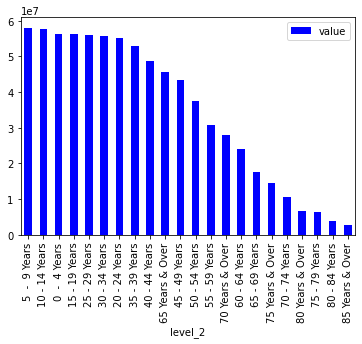

In [9]:
# Population at age level
population_age = population_df[['level_2','value']].groupby('level_2').sum().sort_values('value',ascending=False)
population_age.plot(kind='bar',color='blue')

                                   value
level_1                                 
Total Residents                192175418
Total Chinese                  148157861
Total Female Residents          97167570
Total Male Residents            95007879
Total Female Chinese            75942931
Total Male Chinese              72214945
Total Malays                    25814830
Total Indians                   14563406
Total Male Malays               13005325
Total Female Malays             12809553
Total Male Indians               8034588
Total Female Indians             6528837
Other Ethnic Groups (Total)      3639417
Other Ethnic Groups (Females)    1886349
Other Ethnic Groups (Males)      1753101


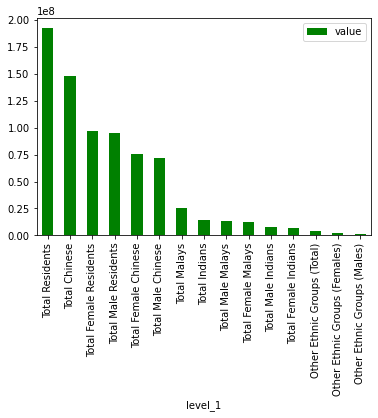

In [10]:
# Population at ethnicity level
population_ethnicity = population_df[['level_1','value']].groupby('level_1').sum().sort_values('value',ascending=False)
print(population_ethnicity)
population_ethnicity.plot(kind='bar',color='green')

##1. Identify the largest Ethnic group in Singapore. Their average population growth over the years and what proportion of the total population do they constitute.

In [11]:
population_df[(population_df['year'] == 2018)].groupby(['level_1'], as_index=False)[['value']].sum().sort_values('value',ascending=False)

,level_1,value
14,Total Residents,5184977
3,Total Chinese,3975586
7,Total Female Residents,2710323
13,Total Male Residents,2474654
4,Total Female Chinese,2094352
10,Total Male Chinese,1881234
9,Total Malays,636807
8,Total Indians,428314
6,Total Female Malays,326562
12,Total Male Malays,310245


In [12]:
population_df.groupby(['level_1'], as_index=False)[['value']].sum().sort_values('value',ascending=False)

,level_1,value
14,Total Residents,192175418
3,Total Chinese,148157861
7,Total Female Residents,97167570
13,Total Male Residents,95007879
4,Total Female Chinese,75942931
10,Total Male Chinese,72214945
9,Total Malays,25814830
8,Total Indians,14563406
12,Total Male Malays,13005325
6,Total Female Malays,12809553


- Identify the largest Ethnic group in Singapore: Chinese 
- Their average population growth over the
years: Mentioned in below df under 'Population growth(%)' column
- What proportion of the total population do they constitute: Mentioned in below df under column 'Chinese in Total(%)'

In [13]:
#population_df.groupby(['level_1'])[['value']].agg('sum') 

In [14]:
ethinic_df = population_df[(population_df['level_1'] == 'Total Chinese')].groupby(['year'], as_index=False)[['value']].sum()
ethinic_df['Total Population']=population_df[(population_df['level_1'] == 'Total Residents')].groupby(['year'], as_index=False)[['value']].sum()['value']
ethinic_df['Population growth(%)'] = ethinic_df.value.pct_change()*100
ethinic_df['Chineese in Total(%)'] = (ethinic_df['value']*100)/ethinic_df['Total Population']
ethinic_df.rename(columns = {'value':'Chineese Population', 'year':'Year'}, inplace = True)
ethinic_df

,Year,Chineese Population,Total Population,Population growth(%),Chineese in Total(%)
0,1957,1137408,1502203,NaN,75.715998
1,1958,1178100,1552500,3.577608,75.884058
2,1959,1235500,1622900,4.872252,76.129152
3,1960,1284000,1683900,3.925536,76.251559
4,1961,1328500,1741200,3.465732,76.297955
...,...,...,...,...,...
57,2014,3675734,4823625,1.878768,76.202731
58,2015,3746225,4907802,1.917739,76.332032
59,2016,3817895,4994232,1.913126,76.446088
60,2017,3897313,5089716,2.080151,76.572308


##2. Identify the largest age group in Singapore. Their average population growth over the years and what proportion of the total population do they constitute.

In [15]:
population_df[(population_df['year'] == 2018)].groupby(['level_2'], as_index=False)[['value']].sum()

,level_2,value
0,0 - 4 Years,742112
1,10 - 14 Years,826120
2,15 - 19 Years,906080
3,20 - 24 Years,1022064
4,25 - 29 Years,1166524
5,30 - 34 Years,1125588
6,35 - 39 Years,1214880
7,40 - 44 Years,1214560
8,45 - 49 Years,1231352
9,5 - 9 Years,796264


- Identify the largest age group in Singapore. : 50-54 years
- Their average population growth over the years : Mentioned in the below df under 'Population growth(%)' 
- What proportion of the total population do they constitute: Mentioned in the below df under '50-54 Years in Total(%) column'

In [16]:
Age_df = population_df[(population_df['level_2'] == '50 - 54 Years')].groupby(['year'], as_index=False)[['value']].sum()
Age_df['Total Population']=population_df[(population_df['level_1'] == 'Total Residents')].groupby(['year'], as_index=False)[['value']].sum()['value']
Age_df['Population growth(%)'] = Age_df.value.pct_change()*100
Age_df['50-54 Years in Total(%)'] = (Age_df['value']*100)/Age_df['Total Population']
Age_df.rename(columns = {'value':'50-54 Years Population', 'year':'Year'}, inplace = True)
Age_df

,Year,50-54 Years Population,Total Population,Population growth(%),50-54 Years in Total(%)
0,1957,207176,1502203,NaN,13.791478
1,1958,216800,1552500,4.645326,13.964573
2,1959,229200,1622900,5.719557,14.122866
3,1960,238400,1683900,4.013962,14.157610
4,1961,250400,1741200,5.033557,14.380887
...,...,...,...,...,...
57,2014,1262012,4823625,0.803545,26.163145
58,2015,1260364,4907802,-0.130585,25.680824
59,2016,1262392,4994232,0.160906,25.277000
60,2017,1251256,5089716,-0.882135,24.584004


#### We can see highest population counts for the age bracket 50-54 years followed by 45-49 years

3. Identify the group (by age, ethnicity and gender) that:
- a. Has shown the highest growth rate
- b. Has shown the lowest growth rate
- c. Has remained the same

In [17]:
population_df.head(1)

,year,level_1,level_2,value
0,1957,Total Residents,0 - 4 Years,264727


# By Gender: 
- Highest growth rate: Chinese 
- Lowest growth rate: Indians
- Nothing remained same

In [18]:
gender_new = population_df[population_df['level_1'].str.contains("Male")].groupby(['level_1'])[['value']].agg('sum') 
#gender_new['Total Population']=population_df[(population_df['level_1'] == 'Total Residents')].groupby(['year'], as_index=False)[['value']].sum()['value']
gender_new['Population growth(%)'] = gender_new.value.pct_change()*100
gender_new.nlargest(2, ['Population growth(%)']) 

,value,Population growth(%)
level_1,,
Total Male Chinese,72214945,4019.268941
Total Male Residents,95007879,630.530602


In [19]:
gender_new.nsmallest(2, ['Population growth(%)']) 

,value,Population growth(%)
level_1,,
Total Male Indians,8034588,-88.874065
Total Male Malays,13005325,61.866732


In [20]:
gender_new_female = population_df[population_df['level_1'].str.contains("Female")].groupby(['level_1'])[['value']].agg('sum') 
#gender_new_female['Total Population']=population_df[(population_df['level_1'] == 'Total Residents')].groupby(['year'], as_index=False)[['value']].sum()['value']
gender_new_female['Population growth(%)'] = gender_new_female.value.pct_change()*100
gender_new_female.nlargest(2, ['Population growth(%)']) 

,value,Population growth(%)
level_1,,
Total Female Chinese,75942931,3925.921555
Total Female Residents,97167570,658.555509


In [21]:
gender_new_female.nsmallest(2, ['Population growth(%)']) 

,value,Population growth(%)
level_1,,
Total Female Indians,6528837,-91.402969
Total Female Malays,12809553,96.199614


In [22]:
# List no. of unique values
print(population_df['year'].unique())
print(len(population_df['level_1'].unique()))
print((population_df['level_1'].unique()))
print(population_df['level_2'].unique())
print(len(population_df['value'].unique()))

[1957 1958 1959 1960 1961 1962 1963 1964 1965 1966 1967 1968 1969 1970
 1971 1972 1973 1974 1975 1976 1977 1978 1979 1980 1981 1982 1983 1984
 1985 1986 1987 1988 1989 1990 1991 1992 1993 1994 1995 1996 1997 1998
 1999 2000 2001 2002 2003 2004 2005 2006 2007 2008 2009 2010 2011 2012
 2013 2014 2015 2016 2017 2018]
15
['Total Residents' 'Total Male Residents' 'Total Female Residents'
 'Total Malays' 'Total Male Malays' 'Total Female Malays' 'Total Chinese'
 'Total Male Chinese' 'Total Female Chinese' 'Total Indians'
 'Total Male Indians' 'Total Female Indians' 'Other Ethnic Groups (Total)'
 'Other Ethnic Groups (Males)' 'Other Ethnic Groups (Females)']
['0  -  4 Years' '5  -  9 Years' '10 - 14 Years' '15 - 19 Years'
 '20 - 24 Years' '25 - 29 Years' '30 - 34 Years' '35 - 39 Years'
 '40 - 44 Years' '45 - 49 Years' '50 - 54 Years' '55 - 59 Years'
 '60 - 64 Years' '65 - 69 Years' '70 - 74 Years' '75 - 79 Years'
 '80 - 84 Years' '65 Years & Over' '70 Years & Over' '75 Years & Over'
 '80 Year

# By ethnicity:

- Highest growth rate: Overall Chinese followed by total female residents (that's an interesting find that femals growth has been more)

- Lowest growth rate: Indian female followed by Indian Male (seems like we don't like Singapore much or Singapore does not like indians)

- Nothing remained same

In [23]:
ethnic_new = population_df.groupby(['level_1'])[['value']].agg('sum') 
#ethnic_new['Total Population']=population_df[(population_df['level_1'] == 'Total Residents')].groupby(['year'], as_index=False)[['value']].sum()['value']
ethnic_new['Population growth(%)'] = ethnic_new.value.pct_change()*100
ethnic_new.nlargest(2, ['Population growth(%)']) 

,value,Population growth(%)
level_1,,
Total Chinese,148157861,3970.922925
Total Female Residents,97167570,658.555509


In [24]:
ethnic_new.nsmallest(2, ['Population growth(%)']) 

,value,Population growth(%)
level_1,,
Total Female Indians,6528837,-91.402969
Total Male Indians,8034588,-88.874065


In [25]:
ethnic_new[(ethnic_new['Population growth(%)'] == 0)]

,value,Population growth(%)
level_1,,


# By Age:

- Highest growth rate: 70 Years & Over (looks like modern medicines are working to prolong life)

- Lowest growth rate: 75 - 79 Years (probably but till the age of 75 only as we have seen lowest growth in the age group 75-79)

- Nothing remained same

In [26]:
age_new = population_df.groupby(['level_2'])[['value']].agg('sum') 
#age_new['Total Population']=population_df[(population_df['level_1'] == 'Total Residents')].groupby(['year'], as_index=False)[['value']].sum()['value']
age_new['Population growth(%)'] = age_new.value.pct_change()*100
age_new.nlargest(2, ['Population growth(%)']) 

,value,Population growth(%)
level_2,,
70 Years & Over,28074338,163.785631
65 Years & Over,45746835,158.858921


In [27]:
age_new.nsmallest(2, ['Population growth(%)']) 

,value,Population growth(%)
level_2,,
75 - 79 Years,6313037,-77.513140
70 - 74 Years,10642861,-76.735306


In [28]:
age_new[(age_new['Population growth(%)'] == 0)]


,value,Population growth(%)
level_2,,


In [29]:
population_df.head(1)

,year,level_1,level_2,value
0,1957,Total Residents,0 - 4 Years,264727


## Graph of population Trends:


In [39]:
set(population_df.level_1) ##Similarly we can plot graphs of above values over years.. below is an example of few population trends. 

{'Other Ethnic Groups (Females)',
 'Other Ethnic Groups (Males)',
 'Other Ethnic Groups (Total)',
 'Total Chinese',
 'Total Female Chinese',
 'Total Female Indians',
 'Total Female Malays',
 'Total Female Residents',
 'Total Indians',
 'Total Malays',
 'Total Male Chinese',
 'Total Male Indians',
 'Total Male Malays',
 'Total Male Residents',
 'Total Residents'}

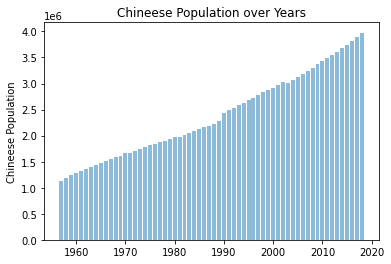

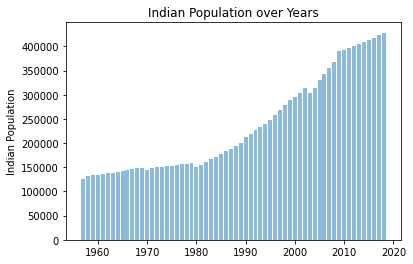

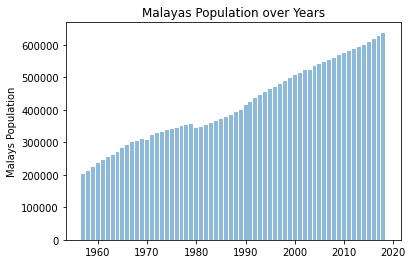

In [40]:
import matplotlib.pyplot as plt
pop_chi = population_df[(population_df['level_1'] == 'Total Chinese')].groupby(['year'], as_index=False)[['value']].sum()
pop_chi
plt.bar(pop_chi.year, pop_chi.value, align='center', alpha=0.5)
plt.ylabel('Chineese Population')
plt.title('Chineese Population over Years')
plt.show()
pop_ind = population_df[(population_df['level_1'] == 'Total Indians')].groupby(['year'], as_index=False)[['value']].sum()
pop_ind
plt.bar(pop_ind.year, pop_ind.value, align='center', alpha=0.5)
plt.ylabel('Indian Population')
plt.title('Indian Population over Years')
plt.show()
pop_Malays = population_df[(population_df['level_1'] == 'Total Malays')].groupby(['year'], as_index=False)[['value']].sum()
pop_Malays
plt.bar(pop_Malays.year, pop_Malays.value, align='center', alpha=0.5)
plt.ylabel('Malays Population')
plt.title('Malayas Population over Years')
plt.show()


# Part 2 - 

The file here contains latitude-longitude information associated with different markers.
You need to find out all of these latitude-longitude pairs, as well as the associated marker id
with these pairs. Create a dataframe out of this, which has three columns - latitude, longitude
and marker id.

In [34]:
import json
import re
with open('/content/drive/My Drive/Computer_vision/Ex_Files_Rec_Machine_Learning_AI_Upd/BMC-ContainmentZones.js', 'r') as data_file:
    data = data_file.read()


In [35]:
list_file = []
with open('/content/drive/My Drive/Computer_vision/Ex_Files_Rec_Machine_Learning_AI_Upd/BMC-ContainmentZones.js') as data_file:
  for line in data_file:
    list_file.append(line)

In [36]:
location_df = pd.DataFrame(columns =['latitude', 'longitude', 'marker_id'])
regex_marker = re.compile(r'(var marker_.*?)(?:= L.marker)')

marker = regex_marker.findall(str(list_file))
marker_id = []

for check in marker:
    marker_id.append(check[11:-1])
    

location_df.marker_id = marker_id


In [37]:
regex_marker2 = re.compile(r'(L.marker.*?)(?:.addTo)')

marker_id2 = regex_marker2.findall(str(list_file))

m = re.findall(r'\d+', str(marker_id2) )


k=0
lat_list=[]
long_list=[]
while k < len(m):
    lat_list.append(m[k]+'.'+m[k+1])
    long_list.append(m[k+2]+'.'+m[k+3])
    k=k+4
    
location_df.latitude = lat_list
location_df.longitude = long_list

In [38]:
location_df

,latitude,longitude,marker_id
0,19.041691972000024,72.85052482000003,9795626cfd584471ab4406d756a00baf
1,19.047690380000063,72.85787174600006,82a31b114c0243859e73c4f5f1332554
2,19.039267403000053,72.85491353500004,0e93001008714f1da3c40e3317183810
3,19.04372482200006,72.85004247900008,a41b90c2ea4a405b8a35811cd094ea68
4,19.017987179000045,72.81980024300003,3e13bed860e9471d9a1323cffd3b6129
...,...,...,...
635,19.16041,72.85515,ba79eea37f8347ee9a3df5f885e4ffc1
636,19.18733,72.81258000000001,cb08d17e9ff24c988e4514059168796d
637,19.20354,72.86236,bfcdac2899914d219a6af40ee233939c
638,19.06544,72.83051,9ffe302c282f4a36a039a749f885a5ef
